<a href="https://colab.research.google.com/github/IngaBesedina/AI_ML_2/blob/main/LabWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
data_path = "https://raw.githubusercontent.com/IngaBesedina/AI_ML_2/main/data/Mall_Customers.csv"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Одиночные признаки

Количественные признаки

In [5]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Numerical Data Type

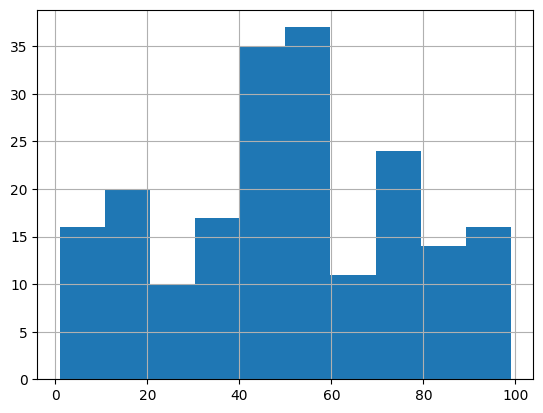

In [7]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['Spending Score (1-100)'].hist();

Categorical Data Type

<ipython-input-29-8ef20eb4b347>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.Genre, palette="nipy_spectral_r")


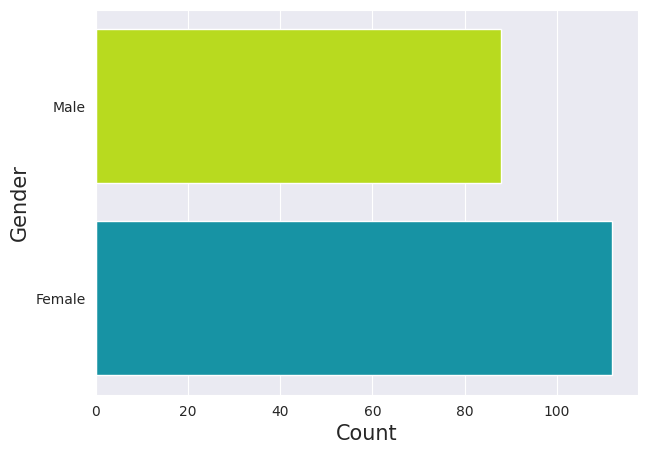

In [29]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')

plt.xlabel("Count", fontsize=15)
plt.ylabel("Gender", fontsize=15)
sns.countplot(data.Genre, palette="nipy_spectral_r")
plt.show()

Female customers are more as compared to the male customers

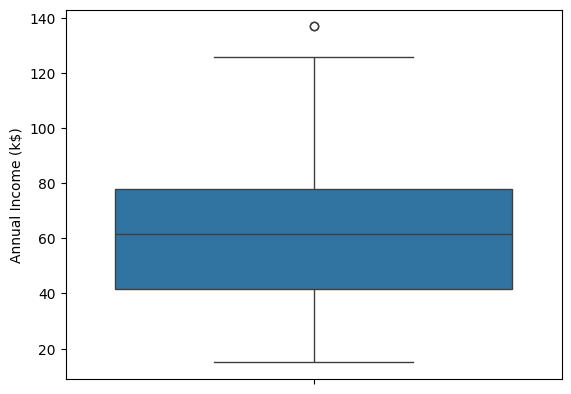

In [8]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['Annual Income (k$)']);

Conclusion - From the above we can see that the data has been clustered into 5 different parts.

In [15]:
df_scaled = data[["Age","Annual Income (k$)","Spending Score (1-100)"]]

# Class instance
scaler = StandardScaler()

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)

In [17]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [18]:
var_list = df_scaled_fit[["Annual Income (k$)","Spending Score (1-100)"]]

In [19]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(var_list)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

In [21]:
kmeans.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2,
       3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [22]:
data["Label"] = kmeans.labels_

In [23]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


<ipython-input-25-f188acb216b0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='Annual Income (k$)', data=data, palette="nipy_spectral_r")


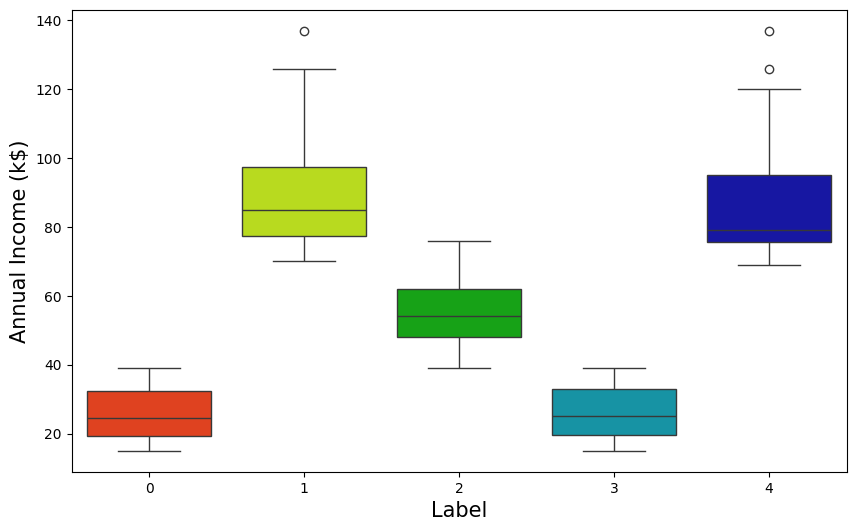

In [25]:
# plot

plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Annual Income (k$)', data=data, palette="nipy_spectral_r")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Annual Income (k$)",fontsize=15)
plt.show()

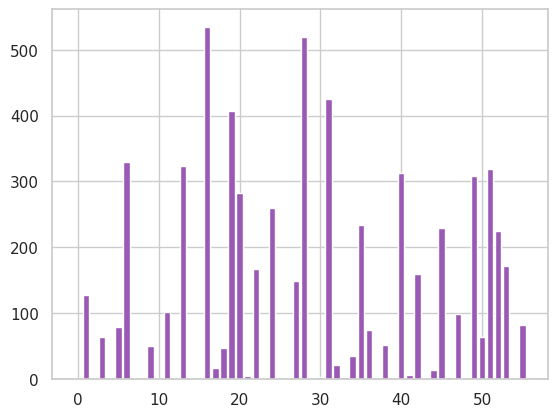

In [ ]:
plt.bar(data.index, data['fatalities_85_99'])
plt.show()

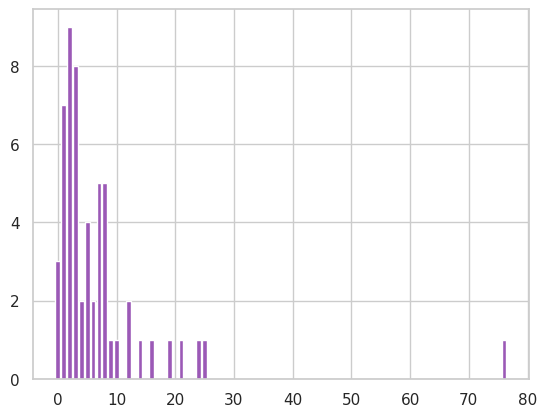

In [ ]:
hist = data['incidents_85_99'].value_counts()
plt.bar(hist.index, hist);

In [ ]:
feats=[f for f in data.columns if 'incidents' in f]
feats

['incidents_85_99', 'incidents_00_14']

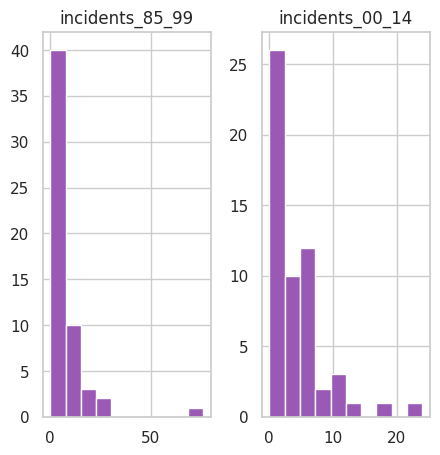

In [ ]:
data[feats].hist(figsize=(5,5));

Взаимосвязанные признаки

Количественный - количественный

In [ ]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'fatal_accidents' in f]
len(feats)

2

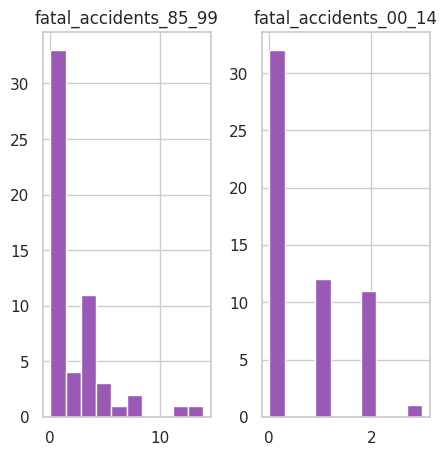

In [ ]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5,5));

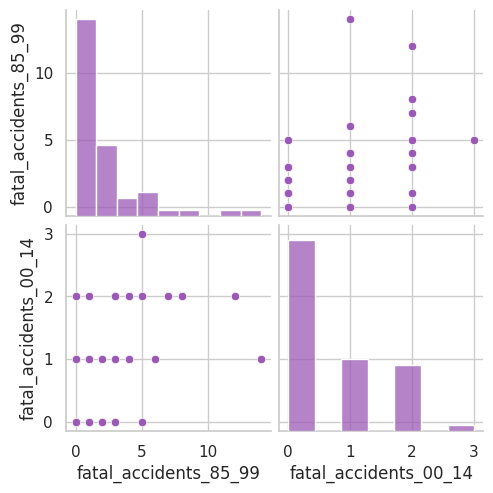

In [ ]:
sns.pairplot(data[feats]);

In [ ]:
data.corr()

<ipython-input-121-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
avail_seat_km_per_week,1.000000,0.279538,0.468300,0.209835,0.725917,0.375673,0.228484
incidents_85_99,0.279538,1.000000,0.856991,0.274394,0.403009,0.390249,0.195337
fatal_accidents_85_99,0.468300,0.856991,1.000000,0.540866,0.572923,0.498758,0.186985
fatalities_85_99,0.209835,0.274394,0.540866,1.000000,0.273696,0.228180,0.046979
incidents_00_14,0.725917,0.403009,0.572923,0.273696,1.000000,0.598071,0.282009
fatal_accidents_00_14,0.375673,0.390249,0.498758,0.228180,0.598071,1.000000,0.695864
fatalities_00_14,0.228484,0.195337,0.186985,0.046979,0.282009,0.695864,1.000000


<ipython-input-122-b9710ca2362c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap=plt.cm.PuBuGn);


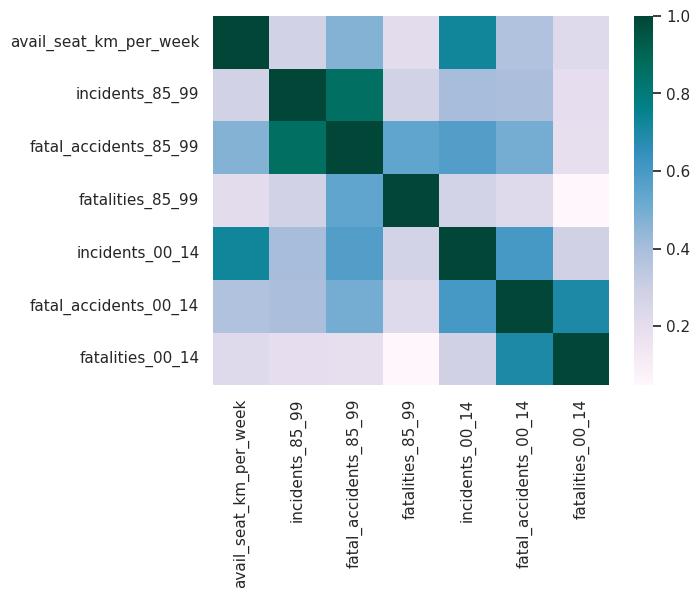

In [ ]:
sns.heatmap(data.corr(), cmap=plt.cm.PuBuGn);

In [ ]:
data_uncorr = data.drop(feats, axis=1)
data_uncorr.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatalities_85_99', 'incidents_00_14', 'fatalities_00_14'],
      dtype='object')

<ipython-input-124-f5d45c9a7e3a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_uncorr.corr(), cmap=plt.cm.rainbow);


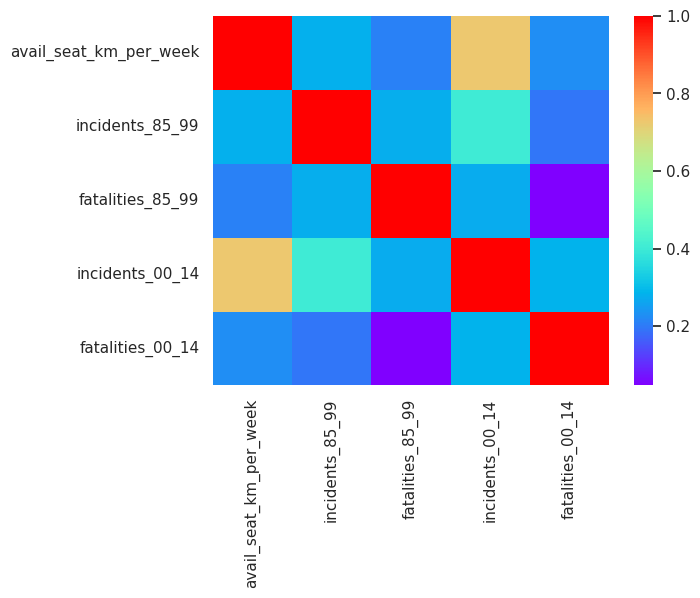

In [ ]:
sns.heatmap(data_uncorr.corr(), cmap=plt.cm.rainbow);